In [1]:
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

In [ ]:
# # Import mnist data
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images = train_images.reshape((60000, 28, 28, 1))
# train_images = train_images.astype('float32')/255

# test_images = test_images.reshape((10000, 28, 28, 1))
# test_images = test_images.astype('float32')/255

# print(f'Train images shape: {train_images.shape}')
# print(f'Test images shape: {test_images.shape}')

In [ ]:
# # Create the model
# inputs = keras.Input(shape=(28,28,1))
# x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(10, activation='softmax')(x)
# model = keras.Model(inputs=inputs, outputs=outputs)

# model.summary()

In [ ]:
# model.compile(optimizer='rmsprop',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [ ]:
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(f'Test Accuracy: {test_acc}')

# Cats and Dogs
---

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lennykiruthu","key":"bffd60b92f708ce59c7dab8b6e152744"}'}

In [3]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 57% 124M/218M [00:00<00:00, 1.29GB/s]
100% 218M/218M [00:00<00:00, 804MB/s] 


In [5]:
!unzip cat-and-dog.zip -d cat_and_dog

Streaming output truncated to the last 5000 lines.
  inflating: cat_and_dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat_and_dog/tr

In [6]:
import  os, shutil, pathlib

In [7]:
original_dir  = pathlib.Path('/content/cat_and_dog/training_set/training_set')
new_base_path = pathlib.Path('/content/cat_and_dog_small')

In [8]:
def make_subset(subset_name, start_index, end_index):
  for category in ('cats', 'dogs'):
    dir = new_base_path / subset_name / category
    os.makedirs(dir)

    fnames = [f'{category[:-1]}.{i}.jpg' for i in range(start_index, end_index)]

    for fname in fnames:
      shutil.copyfile(src=original_dir/category/fname,
                      dst=dir/fname)

make_subset('train', start_index=1000, end_index=2000)
make_subset('validation', start_index=2000, end_index=2500)
make_subset('test', start_index=2500, end_index=3000)

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

Image 1: dog.1065.jpg
 - Format: JPEG
 - Size (width x height): (445, 334)
 - Mode: RGB
----------------------------------------


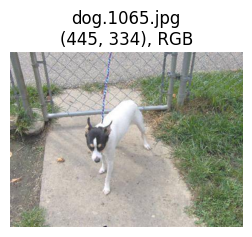

Image 2: dog.1078.jpg
 - Format: JPEG
 - Size (width x height): (374, 454)
 - Mode: RGB
----------------------------------------


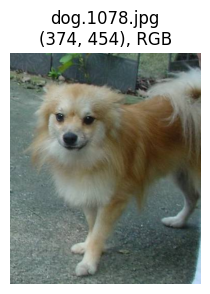

Image 3: dog.1080.jpg
 - Format: JPEG
 - Size (width x height): (414, 500)
 - Mode: RGB
----------------------------------------


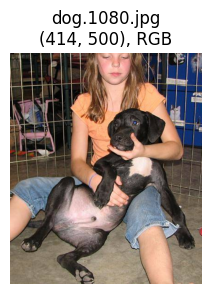

Image 4: dog.1407.jpg
 - Format: JPEG
 - Size (width x height): (400, 361)
 - Mode: RGB
----------------------------------------


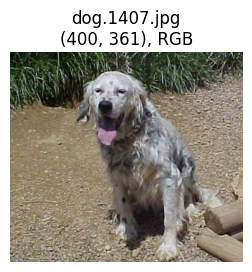

Image 5: dog.1522.jpg
 - Format: JPEG
 - Size (width x height): (450, 326)
 - Mode: RGB
----------------------------------------


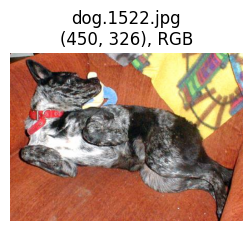

Image 6: dog.1681.jpg
 - Format: JPEG
 - Size (width x height): (183, 253)
 - Mode: RGB
----------------------------------------


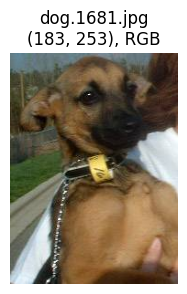

Image 7: dog.1816.jpg
 - Format: JPEG
 - Size (width x height): (191, 191)
 - Mode: RGB
----------------------------------------


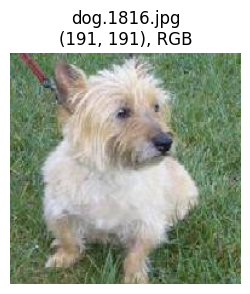

Image 8: dog.1817.jpg
 - Format: JPEG
 - Size (width x height): (419, 427)
 - Mode: RGB
----------------------------------------


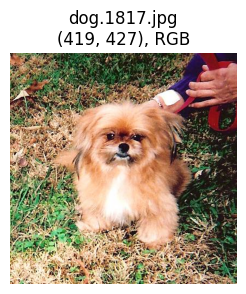

Image 9: dog.1872.jpg
 - Format: JPEG
 - Size (width x height): (500, 376)
 - Mode: RGB
----------------------------------------


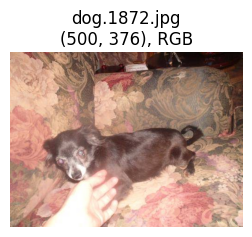

Image 10: dog.1964.jpg
 - Format: JPEG
 - Size (width x height): (500, 427)
 - Mode: RGB
----------------------------------------


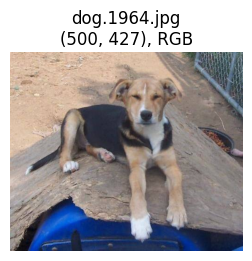

In [10]:
folder_path = '/content/cat_and_dog_small/train/dogs'

image_files = sorted(os.listdir(folder_path)[:10])

for i, filename in enumerate(image_files):
  img_path = os.path.join(folder_path, filename)

  try:
      with Image.open(img_path) as img:
        # Print image properties
        print(f"Image {i+1}: {filename}")
        print(f" - Format: {img.format}")
        print(f" - Size (width x height): {img.size}")
        print(f" - Mode: {img.mode}")
        print("-" * 40)

        # Show the image
        plt.figure(figsize=(3,3))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{filename}\n{img.size}, {img.mode}")
        plt.show()

  except Exception as e:
    print(f"Could not open {filename}: {e}")

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory('/content/cat_and_dog_small/train',
                                             image_size=(180, 180),
                                             batch_size=32)

test_dataset = image_dataset_from_directory('/content/cat_and_dog_small/test',
                                             image_size=(180, 180),
                                             batch_size=32)

val_dataset = image_dataset_from_directory('/content/cat_and_dog_small/validation',
                                             image_size=(180, 180),
                                             batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## Deep Learning
---

In [ ]:
inputs  = keras.Input(shape=(180,180,3))
x       = layers.Rescaling(1./255)(inputs)
x       = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model   = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,305 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,801 (3.74 MB)

 Trainable params: 980,801 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
for data_batch, label_batch in train_dataset:
  print('Data batch shape:', data_batch.shape)
  print('Data label shape:', label_batch.shape)
  break

Data batch shape: (32, 180, 180, 3)
Data label shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convet_from_scratch.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.5182 - loss: 0.6956 - val_accuracy: 0.6050 - val_loss: 0.6908
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.5611 - loss: 0.6906 - val_accuracy: 0.6080 - val_loss: 0.6693
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6050 - loss: 0.6581 - val_accuracy: 0.6600 - val_loss: 0.6208
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6589 - loss: 0.6215 - val_accuracy: 0.6770 - val_loss: 0.6116
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6805 - loss: 0.6020 - val_accuracy: 0.6080 - val_loss: 0.6547
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.7020 - loss: 0.5606 - val_accuracy: 0.5910 - val_loss: 0.6588
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7229 - loss: 0.5442 - val_accuracy: 0.7120 - val_loss: 0.5707
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7411 - loss: 0.5174 - val_accuracy: 0.7400 -

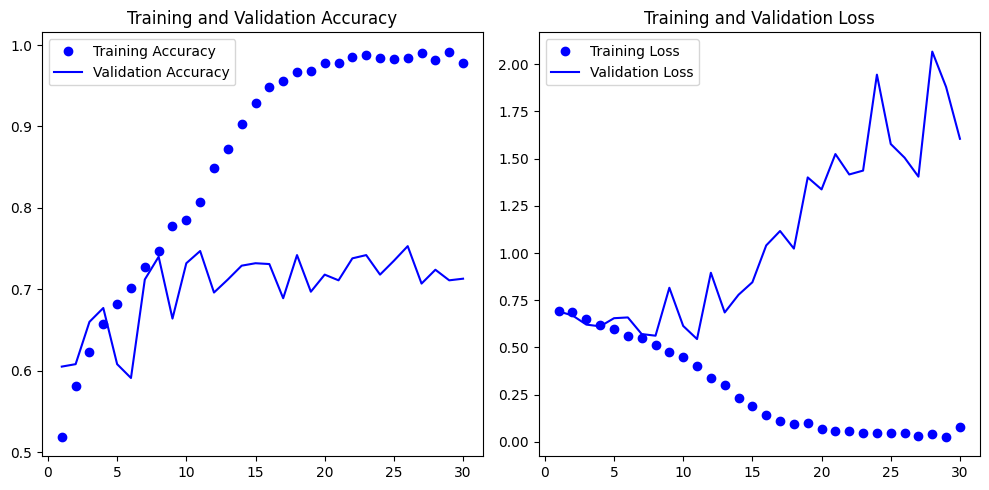

In [ ]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']
epochs       = range(1, len(accuracy)+1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
test_model = keras.models.load_model('/content/convet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.3f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7118 - loss: 0.5831
Test Accuracy: 0.707


# Data Augmentation
---

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

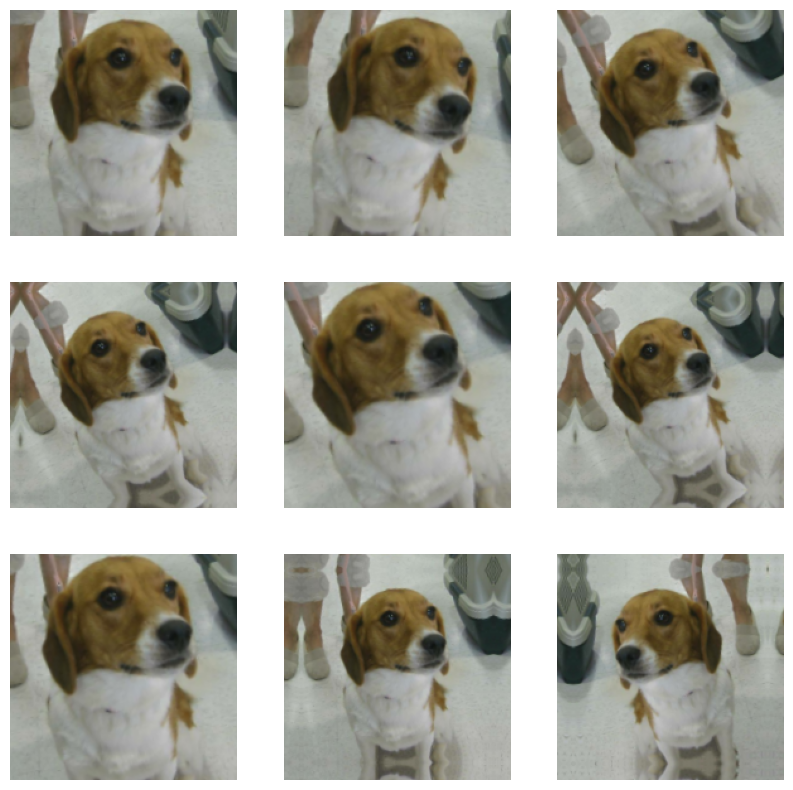

In [ ]:
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3, i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
inputs  = keras.Input(shape=(180,180,3))
x       = data_augmentation(inputs)
x       = layers.Rescaling(1./255)(x)
x       = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Flatten()(x)
x       = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model   = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         2,305 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,801 (3.74 MB)

 Trainable params: 980,801 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convet_from_scratch_with_data_augmentation.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [ ]:
history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.4883 - loss: 0.6964 - val_accuracy: 0.5060 - val_loss: 0.6932
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4939 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5434 - loss: 0.6931 - val_accuracy: 0.5090 - val_loss: 0.6822
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.5910 - loss: 0.6771 - val_accuracy: 0.6520 - val_loss: 0.6364
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.5998 - loss: 0.6725 - val_accuracy: 0.5130 - val_loss: 0.8964
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6123 - loss: 0.6696 - val_accuracy: 0.6730 - val_loss: 0.6119
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6419 - loss: 0.6353 - val_accuracy: 0.5590 - val_loss: 0.7652
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6460 - loss: 0.6441 - val_accuracy: 0.

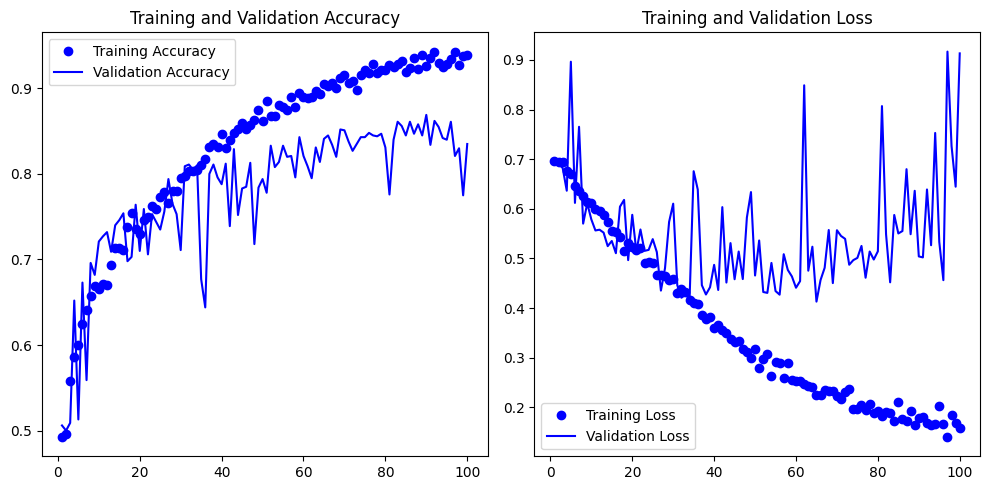

In [ ]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']
epochs       = range(1, len(accuracy)+1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
test_model = keras.models.load_model('/content/convet_from_scratch_with_data_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.3f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8309 - loss: 0.4533
Test Accuracy: 0.812


# Feature Extraction using a Pre-Trained Model.
---

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180,180,3)
)

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels   = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)

  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)
val_features, val_labels = get_features_and_labels(val_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
inputs  = keras.Input(shape=(5,5,512))
x       = layers.Flatten()(inputs)
x       = layers.Dense(256)(x)
x       = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model   = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction.keras',
        save_best_only=True,
        monitor='val_loss')]

history = model.fit(
    train_features, train_labels,
    epochs = 20,
    validation_data = (val_features, val_labels),
    callbacks = callbacks
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8625 - loss: 17.9804 - val_accuracy: 0.9740 - val_loss: 3.2304
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9828 - loss: 2.5545 - val_accuracy: 0.9680 - val_loss: 5.6320
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9870 - loss: 1.6124 - val_accuracy: 0.9660 - val_loss: 6.4266
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9868 - loss: 1.4614 - val_accuracy: 0.9770 - val_loss: 5.2306
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9924 - loss: 0.7159 - val_accuracy: 0.9610 - val_loss: 7.8228
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9970 - loss: 0.4537 - val_accuracy: 0.9770 - val_loss: 5.1609
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9979 - loss: 0.1054 - val_accuracy: 0.9690 - val_loss: 6.4601
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9964 - loss: 0.2185 - val_accuracy: 0.9500 - val_los

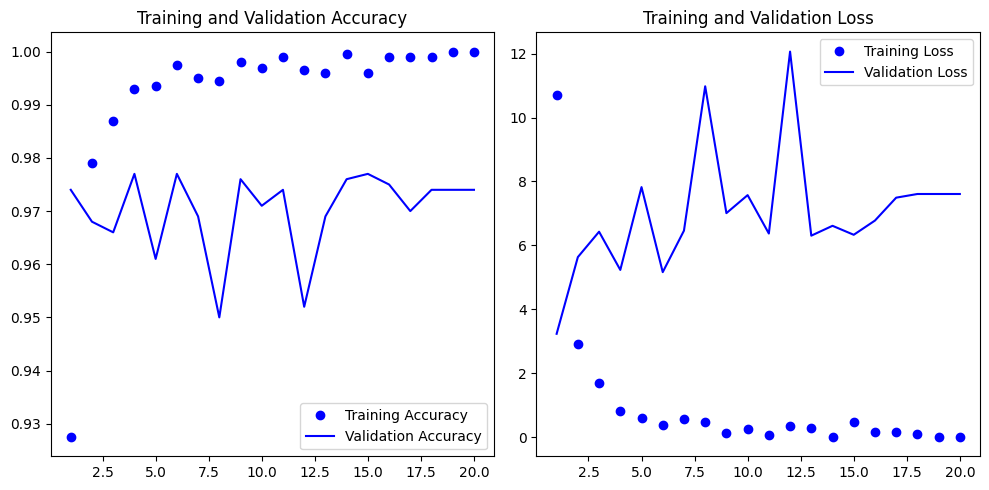

In [ ]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']
epochs       = range(1, len(accuracy)+1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False)

conv_base.trainable=True
print('This is the number of training weights, before freezing '
 'conv_base: ', len(conv_base.trainable_weights))

conv_base.trainable=False
print('This is the number of training weights, after freezing '
 'conv_base: ', len(conv_base.trainable_weights))


This is the number of training weights, before freezing conv_base:  26
This is the number of training weights, after freezing conv_base:  0


# Data Augmentation and Feature Extraction using a Pre-Trained Model
---

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

inputs  = keras.Input(shape=(180,180,3))
x       = data_augmentation(inputs)
x       = keras.applications.vgg16.preprocess_input(x)
x       = conv_base(x)
x       = layers.Flatten()(x)
x       = layers.Dense(256)(x)
x       = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model   = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction_with_data_augmentation.keras',
        save_best_only=True,
        monitor='val_loss')]

history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.8441 - loss: 42.3025 - val_accuracy: 0.9680 - val_loss: 5.0059
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.9456 - loss: 7.5633 - val_accuracy: 0.9600 - val_loss: 5.5859
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.9526 - loss: 6.4324 - val_accuracy: 0.9700 - val_loss: 6.4211
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.9595 - loss: 5.0128 - val_accuracy: 0.9360 - val_loss: 13.4065
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9620 - loss: 4.7565 - val_accuracy: 0.9700 - val_loss: 6.0021
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.9722 - loss: 2.7537 - val_accuracy: 0.9690 - val_loss: 6.3566
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.9711 - loss: 4.8009 - val_accuracy: 0.9680 - val_loss: 8.2233
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.9731 - loss: 2.1811 - val_accuracy

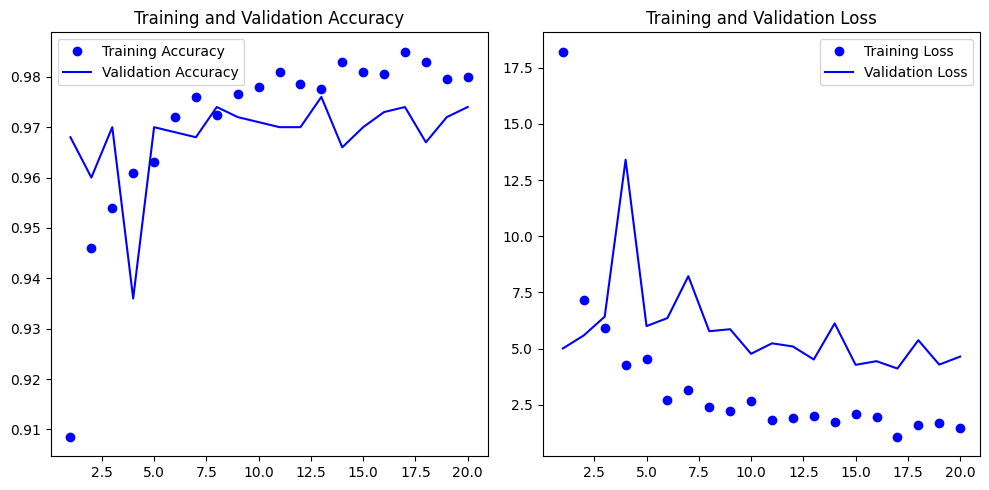

In [ ]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']
epochs       = range(1, len(accuracy)+1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
test_model = keras.models.load_model('/content/feature_extraction_with_data_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.3f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9709 - loss: 5.6219
Test Accuracy: 0.963


# Fine Tuning a Pre-Trained Model.
---

In [ ]:
conv_base = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.trainable=True
for layer in conv_base.layers[:-4]:
  layer.trainable=False

In [ ]:
for i, layer in enumerate(conv_base.layers):
  print(f'Layer {i+1}: {layer.name} {layer.trainable}')

Layer 1: input_layer False
Layer 2: block1_conv1 False
Layer 3: block1_conv2 False
Layer 4: block1_pool False
Layer 5: block2_conv1 False
Layer 6: block2_conv2 False
Layer 7: block2_pool False
Layer 8: block3_conv1 False
Layer 9: block3_conv2 False
Layer 10: block3_conv3 False
Layer 11: block3_pool False
Layer 12: block4_conv1 False
Layer 13: block4_conv2 False
Layer 14: block4_conv3 False
Layer 15: block4_pool False
Layer 16: block5_conv1 True
Layer 17: block5_conv2 True
Layer 18: block5_conv3 True
Layer 19: block5_pool True


In [ ]:
inputs  = keras.Input(shape=(180,180,3))
x       = keras.applications.vgg16.preprocess_input(inputs)
x       = conv_base(x)
x       = layers.Flatten()(x)
x       = layers.Dense(256)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model   = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_tuning.keras',
        save_best_only=True,
        monitor='val_loss')]

history = model.fit(
    train_dataset,
    epochs = 20,
    validation_data = val_dataset,
    callbacks = callbacks
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 373ms/step - accuracy: 0.7295 - loss: 4.8390 - val_accuracy: 0.9330 - val_loss: 0.6385
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.9894 - loss: 0.0626 - val_accuracy: 0.9330 - val_loss: 0.5582
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 218ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9460 - val_loss: 0.5893
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 1.0000 - loss: 1.1047e-04 - val_accuracy: 0.9450 - val_loss: 0.5374
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 1.0000 - loss: 1.6930e-05 - val_accuracy: 0.9460 - val_loss: 0.4993
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - accuracy: 1.0000 - loss: 2.0000e-06 - val_accuracy: 0.9470 - val_loss: 0.4932
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 1.0000 - loss: 1.1080e-06 - val_accuracy: 0.9470 - val_loss: 0.4920
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 1.0000 - loss: 1

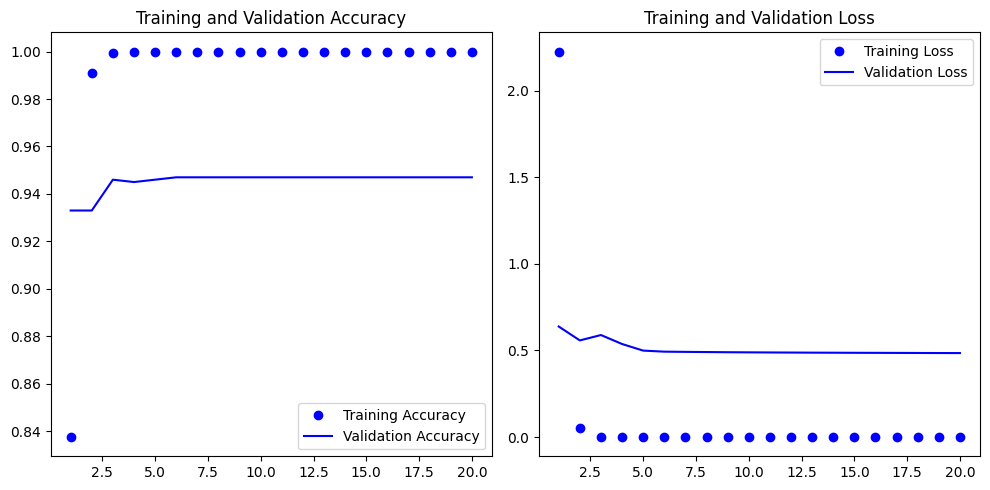

In [ ]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']
epochs       = range(1, len(accuracy)+1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
test_model = keras.models.load_model('/content/feature_tuning.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.3f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9388 - loss: 0.7916
Test Accuracy: 0.942


# Batch Normlaization & Depthwise Separable Convolutions
---

In [15]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

inputs = keras.Input(shape=(180,180,3))
x      = data_augmentation(inputs)
x      = layers.Rescaling(1./255)(x)
x      = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
  residual = x

  x        = layers.BatchNormalization()(x)
  x        = layers.Activation('relu')(x)
  x        = layers.SeparableConv2D(size, 3, padding='same', use_bias=False)(x)

  x        = layers.BatchNormalization()(x)
  x        = layers.Activation('relu')(x)
  x        = layers.SeparableConv2D(size, 3, padding='same', use_bias=False)(x)

  x        = layers.MaxPooling2D(3, strides=2, padding='same')(x)
  residual = layers.Conv2D(size, 1, strides=2, padding='same', use_bias=False)(residual)
  x        = layers.add([x, residual])

x       = layers.GlobalAveragePooling2D()(x)
x       = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model   = keras.Model(inputs = inputs, outputs = outputs)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='residuals_batch_normalization_and_separable_conv2d.keras',
        save_best_only=True,
        monitor='val_loss')]

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 216ms/step - accuracy: 0.5579 - loss: 0.7671 - val_accuracy: 0.5000 - val_loss: 0.7493
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.5967 - loss: 0.6684 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.6121 - loss: 0.6498 - val_accuracy: 0.5080 - val_loss: 0.6930
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.6617 - loss: 0.6275 - val_accuracy: 0.5000 - val_loss: 0.7482
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.6614 - loss: 0.6194 - val_accuracy: 0.5000 - val_loss: 0.7277
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.6659 - loss: 0.6005 - val_accuracy: 0.5000 - val_loss: 0.8059
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.6570 - loss: 0.6147 - val_accuracy: 0.5020 - val_loss: 0.9907
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.6888 - loss: 0.6003 - 

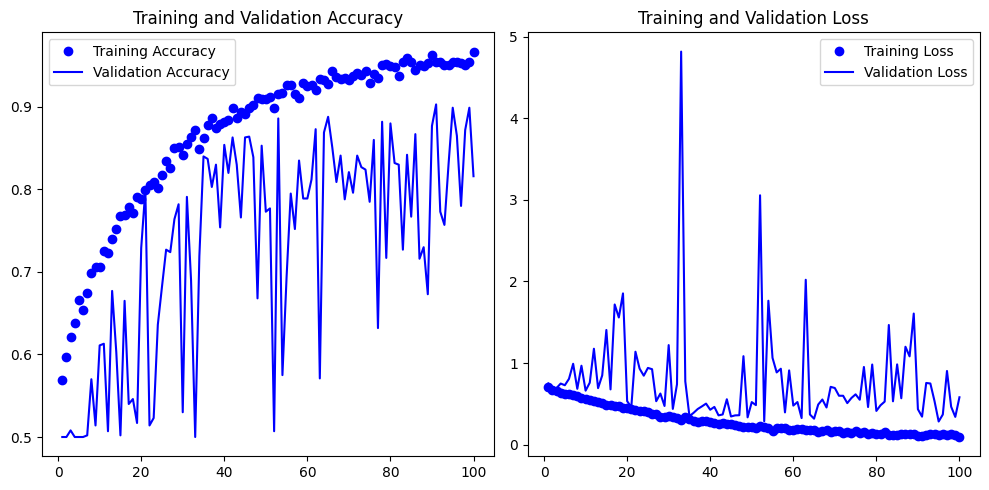

In [16]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']
epochs       = range(1, len(accuracy)+1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [17]:
test_model = keras.models.load_model('/content/residuals_batch_normalization_and_separable_conv2d.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.3f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8819 - loss: 0.2733
Test Accuracy: 0.881
